# Advanced Data Preparation with Python (Apartment Data)

## Libraries and settings

In [1]:
# Libraries
import os
import re
import time
import fnmatch
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Get current working directory
print(os.getcwd())

/workspaces/python_data_preparation


## Importing data

In [2]:
# Read the data to a pandas data frame
df = pd.read_csv('./Data/apartments_data_zuerich.csv', 
                 sep=',', 
                 encoding='utf-8')

# Show first records of data frame
df.head()

,web-scraper-order,web-scraper-start-url,rooms_area_price_raw,address_raw,price_raw,description_raw,text_raw
0,1693998201-1,https://www.immoscout24.ch/de/immobilien/miete...,"3 Zimmer, 49 m², CHF 1441.—","Neuhusstrasse 6, 8630 Rüti ZH, ZH",CHF 1441.—,«Gemütliche Wohnung im Grünen»,"3 Zimmer, 49 m², CHF 1441.—Neuhusstrasse 6, 86..."
1,1693998201-2,https://www.immoscout24.ch/de/immobilien/miete...,"3,5 Zimmer, 65 m², CHF 1850.—","Zürcherstrasse 1, 8173 Neerach, ZH",CHF 1850.—,«Attraktive 3.5-Zimmer-EG-Wohnung in Neerach»,"3,5 Zimmer, 65 m², CHF 1850.—Zürcherstrasse 1,..."
2,1693998201-3,https://www.immoscout24.ch/de/immobilien/miete...,"19 m², CHF 2686.—","Cramerstrasse 8-12, 8004 Zürich, ZH",CHF 2686.—,«Studio Apartment Junior Balcony»,"19 m², CHF 2686.—Cramerstrasse 8-12, 8004 Züri..."
3,1693998201-4,https://www.immoscout24.ch/de/immobilien/miete...,"2 Zimmer, 54 m², CHF 4853.—","Cramerstrasse 8-12, 8004 Zürich, ZH",CHF 4853.—,«2 Bedroom Apartment Senior Balcony»,"2 Zimmer, 54 m², CHF 4853.—Cramerstrasse 8-12,..."
4,1693998201-5,https://www.immoscout24.ch/de/immobilien/miete...,"2 Zimmer, 49 m², CHF 4335.—","Rotachstrasse 33, 8003 Zürich, ZH",CHF 4335.—,«2 Bedroom Apartment Junior Terrace»,"2 Zimmer, 49 m², CHF 4335.—Rotachstrasse 33, 8..."


## Count number of rows and columns in the data frame

In [3]:
# Dimension (rows, columns)
print('Dimension:', df.shape)

# Number of rows
print('Number of rows:', df.shape[0])

# Number of columns
### dh.shape scheint ein Array (2) zu sein
print('Number of columns:', df.shape[1])

Dimension: (1008, 7)
Number of rows: 1008
Number of columns: 7


## Get data types (raw-format from web scraper)

In [4]:
# Get data types (note that in pandas, a string is referred to as 'object')
df.dtypes

web-scraper-order        object
web-scraper-start-url    object
rooms_area_price_raw     object
address_raw              object
price_raw                object
description_raw          object
text_raw                 object
dtype: object

## Extract information from raw data using regular expressions (regex)

### Extract number of rooms

In [ ]:
# Extract values from 'rooms_area_price_raw' strings
### Regex expression, revise this! 
### in regex, \d+ means one or more digits, \s* means zero or more whitespaces, \d+,\d+ means one or more digits followed by a comma and one or more digits
rooms = []
for i in df['rooms_area_price_raw']:
    d1 = re.findall("(\d+,\d+|\d+)\s*Zimmer", i)
    try:
        ### strip() removes leading and trailing whitespaces, 
        d2 = d1[0].strip().replace(',', '.')
    except:
        d2 = None
    rooms.append(d2)

# Save as new variable in the pandas data frame
df['rooms'] = pd.Series(rooms, dtype="float64")
    
# Show first records of data frame
df[['rooms_area_price_raw', 'rooms']].head()


,rooms_area_price_raw,rooms
0,"3 Zimmer, 49 m², CHF 1441.—",3.0
1,"3,5 Zimmer, 65 m², CHF 1850.—",3.5
2,"19 m², CHF 2686.—",NaN
3,"2 Zimmer, 54 m², CHF 4853.—",2.0
4,"2 Zimmer, 49 m², CHF 4335.—",2.0


### Extract living area

In [6]:
# Extract values from 'rooms_area_price_raw' strings
area = []
for i in df['rooms_area_price_raw']:
    d1 = re.findall("(\d+)\s*m²", i)
    try:
        d2 = d1[0].strip()
    except:
        d2 = None
    area.append(d2)

# Save as new variable in the pandas data frame
df['area'] = pd.Series(area, dtype="Int64")

# Show first records of data frame
df[['rooms_area_price_raw', 'area']].head()

,rooms_area_price_raw,area
0,"3 Zimmer, 49 m², CHF 1441.—",49
1,"3,5 Zimmer, 65 m², CHF 1850.—",65
2,"19 m², CHF 2686.—",19
3,"2 Zimmer, 54 m², CHF 4853.—",54
4,"2 Zimmer, 49 m², CHF 4335.—",49


### Extract rental price

In [7]:
# Extract values from 'price_raw' strings
price = []
for i in df['price_raw']:
    d1 = re.findall("CHF\s*(\d+)\.—", i)
    try:
        d2 = d1[0].strip()
    except:
        d2 = None
    price.append(d2)

# Save as new variable in the pandas data frame
df['price'] = pd.Series(price, dtype="Int64")

# Show first records of data frame
df[['rooms_area_price_raw', 'price']].head()

,rooms_area_price_raw,price
0,"3 Zimmer, 49 m², CHF 1441.—",1441
1,"3,5 Zimmer, 65 m², CHF 1850.—",1850
2,"19 m², CHF 2686.—",2686
3,"2 Zimmer, 54 m², CHF 4853.—",4853
4,"2 Zimmer, 49 m², CHF 4335.—",4335


### Get data types of all variables, including the new once

In [8]:
df.dtypes

web-scraper-order         object
web-scraper-start-url     object
rooms_area_price_raw      object
address_raw               object
price_raw                 object
description_raw           object
text_raw                  object
rooms                    float64
area                       Int64
price                      Int64
dtype: object

## Count and remove missing values

In [9]:
# Count missing values
print(f"Number of missing values: {pd.isna(df).sum().sum()}")

# Drop rows with missing values (if any)
df = df.dropna().reset_index(drop=True)

Number of missing values: 157


## Count and remove duplicated values

In [10]:
# Count duplicated values
print(f"Number of duplicated values: {df[df[['web-scraper-order']].duplicated()].sum().sum()}")

# Drop rows with duplicated values (if any)
df = df.drop_duplicates().reset_index(drop=True)

# Dimension (rows, columns)
print('\nDimension:', df.shape)

Number of duplicated values: 0.0

Dimension: (861, 10)


## Use string manipulation methods to create additional variables from the apartment descriptions.

### Change strings in 'description_raw' ad 'text_raw' to uppercase 

In [11]:
# Change strings in 'description_raw' to uppercase 
df['description_raw'] = df['description_raw'].str.upper()
print('Description:\n', df['description_raw'].head(5), '\n')

# Change strings in 'text_raw' to uppercase 
df['text_raw'] = df['text_raw'].str.upper()
print('Text:\n', df['text_raw'].head(5))

Description:
 0                   «GEMÜTLICHE WOHNUNG IM GRÜNEN»
1    «ATTRAKTIVE 3.5-ZIMMER-EG-WOHNUNG IN NEERACH»
2             «2 BEDROOM APARTMENT SENIOR BALCONY»
3             «2 BEDROOM APARTMENT JUNIOR TERRACE»
4                       «2 BEDROOM APARTMENT MINI»
Name: description_raw, dtype: object 

Text:
 0    3 ZIMMER, 49 M², CHF 1441.—NEUHUSSTRASSE 6, 86...
1    3,5 ZIMMER, 65 M², CHF 1850.—ZÜRCHERSTRASSE 1,...
2    2 ZIMMER, 54 M², CHF 4853.—CRAMERSTRASSE 8-12,...
3    2 ZIMMER, 49 M², CHF 4335.—ROTACHSTRASSE 33, 8...
4    2 ZIMMER, 32 M², CHF 3515.—WOLFRAMPLATZ 1, 804...
Name: text_raw, dtype: object


### Calculate length of strings in 'description_raw' and 'text_raw'

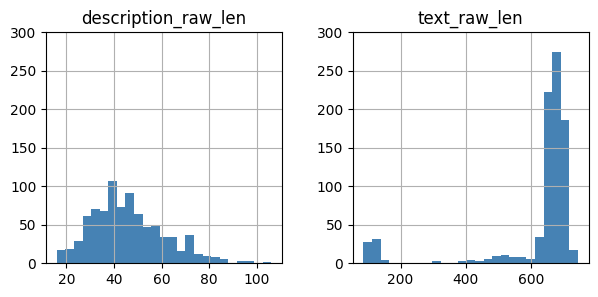

In [12]:
# Length of the strings in 'description_raw'
df['description_raw_len'] = df['description_raw'].str.len()

# Length of the strings in 'text_raw'
df['text_raw_len'] = df['text_raw'].str.len()

# Histogram of the length of the strings in 'description_raw' and 'text_raw'
ax = df[['description_raw_len', 'text_raw_len']].hist(bins=25, 
                                                      figsize=(7, 3), 
                                                      color='steelblue')

# Set the y-axis range for each subplot
for axis in ax.flatten():
    axis.set_ylim(0, 300)

# Display the plot
plt.show()

### Create binary (0/1) variable 'luxurious'

In [13]:
# Create a pattern which can be used to search the variable 'description_raw'
pattern = 'LOFT|SEESICHT|PENTHOUSE|LUXUS'

# Create new variable 'luxurious' as binary dummy (0/1) variable
df['luxurious'] = df['description_raw'].str.contains(pat = pattern).astype(int)
print(df['luxurious'].sum())

# Show values
df[['description_raw','rooms','area','price','luxurious']].loc[df['luxurious'] == 1]

22


,description_raw,rooms,area,price,luxurious
64,«SONNIGE ATTIKAWOHNUNG MIT SEESICHT IN RICHTER...,3.5,105,3410,1
85,«2.5-ZIMMER-LOFT WOHNUNG AN TOP LAGE ZU VERMIE...,2.5,64,2560,1
88,«EXKLUSIVE 1.5 ZI LOFT-WOHNUNG IM HOCHHAUS HAR...,1.5,81,3131,1
91,«IN LOFT-IGER HÖHE MIETEN OHNE KAUTION»,1.0,132,3260,1
114,«3 1/2-ZIMMER-WOHNUNG MIT SEESICHT»,3.5,100,5550,1
141,«EXKLUSIVER SEEBLICK: LUXUSWOHNEN AN ZÜRICHS U...,3.5,169,9000,1
150,«WILLKOMMEN IN “WOLLYWOOD” SEESICHT 3.5-ZIMMER...,3.5,100,9150,1
214,«ATTIKA-WOHNUNG IN LOFT-STYLE - 140M2»,3.5,140,3200,1
236,"«MÖBLIERT, TEMPORÄR: 2½ ZIMMER-LOFT IN DÜBENDO...",2.5,55,2417,1
280,«2.5 ZIMMERWOHNUNG MIT SEESICHT UND GARTEN»,2.5,75,6900,1


### Create variable 'price_per_m2'

In [14]:
# Create the new variable
df['price_per_m2'] = round(df['price'] / df['area'], 2)

# Show values
df[['description_raw','rooms','area','price','luxurious','price_per_m2']]

,description_raw,rooms,area,price,luxurious,price_per_m2
0,«GEMÜTLICHE WOHNUNG IM GRÜNEN»,3.0,49,1441,0,29.41
1,«ATTRAKTIVE 3.5-ZIMMER-EG-WOHNUNG IN NEERACH»,3.5,65,1850,0,28.46
2,«2 BEDROOM APARTMENT SENIOR BALCONY»,2.0,54,4853,0,89.87
3,«2 BEDROOM APARTMENT JUNIOR TERRACE»,2.0,49,4335,0,88.47
4,«2 BEDROOM APARTMENT MINI»,2.0,32,3515,0,109.84
...,...,...,...,...,...,...
856,"«CHARMANTE WOHNUNG IN HOTTINGEN, NÄHE RÖMERHOF»",3.5,82,2830,0,34.51
857,«HEIMELIGE 4-ZIMMER-WOHNUNG IN WINTERTHUR-HEGI»,4.0,73,1713,0,23.47
858,«EXKLUSIVE WOHNUNG FÜR HÖCHSTE ANSPRÜCHE - MIT...,4.5,110,3500,1,31.82
859,«MODERNE WOHNUNG AN RUHIGER LAGE»,3.0,68,1650,0,24.26


### Include current datetime as time stamp

In [15]:
# Get and format datetime
df['datetime'] = datetime.now().strftime("%Y-%m-%d %H:%M:%S")

# Show values
df[['description_raw','rooms','area','price','luxurious','price_per_m2', 'datetime']]

,description_raw,rooms,area,price,luxurious,price_per_m2,datetime
0,«GEMÜTLICHE WOHNUNG IM GRÜNEN»,3.0,49,1441,0,29.41,2024-11-03 17:14:42
1,«ATTRAKTIVE 3.5-ZIMMER-EG-WOHNUNG IN NEERACH»,3.5,65,1850,0,28.46,2024-11-03 17:14:42
2,«2 BEDROOM APARTMENT SENIOR BALCONY»,2.0,54,4853,0,89.87,2024-11-03 17:14:42
3,«2 BEDROOM APARTMENT JUNIOR TERRACE»,2.0,49,4335,0,88.47,2024-11-03 17:14:42
4,«2 BEDROOM APARTMENT MINI»,2.0,32,3515,0,109.84,2024-11-03 17:14:42
...,...,...,...,...,...,...,...
856,"«CHARMANTE WOHNUNG IN HOTTINGEN, NÄHE RÖMERHOF»",3.5,82,2830,0,34.51,2024-11-03 17:14:42
857,«HEIMELIGE 4-ZIMMER-WOHNUNG IN WINTERTHUR-HEGI»,4.0,73,1713,0,23.47,2024-11-03 17:14:42
858,«EXKLUSIVE WOHNUNG FÜR HÖCHSTE ANSPRÜCHE - MIT...,4.5,110,3500,1,31.82,2024-11-03 17:14:42
859,«MODERNE WOHNUNG AN RUHIGER LAGE»,3.0,68,1650,0,24.26,2024-11-03 17:14:42


## Discretization of numerical data

In [ ]:
# Discretization of the variable 'price_per_m2'
    ### discreztizsation means to divide the variable into nominal categories
    ### pd.cut will usually create bins of equal width. You can define edges of bins by doing: bins = [0, 10, 20, 30, 40, 50] eg.
df['price_per_m2_cat'] = pd.cut(df['price_per_m2'], 
                                bins = 5, 
                                labels = ['very cheap', 
                                            'cheap', 
                                            'normal', 
                                            'expensive', 
                                            'very expensive'])

# Show unique values
df['price_per_m2_cat'].unique()

['very cheap', 'normal', 'expensive', 'cheap', 'very expensive']
Categories (5, object): ['very cheap' < 'cheap' < 'normal' < 'expensive' < 'very expensive']

## One Hot Encoding

In [17]:
# One Hot Encoding of the variable 'price_per_m2_cat'
try:
    df = pd.get_dummies(df, 
                        columns=['price_per_m2_cat'], 
                        drop_first=False)
except:
    print("Dummy variables already exist")

# Convert boolean values to integers (0 and 1)
df[df.filter(like='price_per_m2_cat').columns] = df.filter(like='price_per_m2_cat').astype(int)

# Show values of the new dummy variables
df.filter(like='price_per_m2_cat').head()

,price_per_m2_cat_very cheap,price_per_m2_cat_cheap,price_per_m2_cat_normal,price_per_m2_cat_expensive,price_per_m2_cat_very expensive
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,0,1,0


## Scaling

### Min-Max Scaling

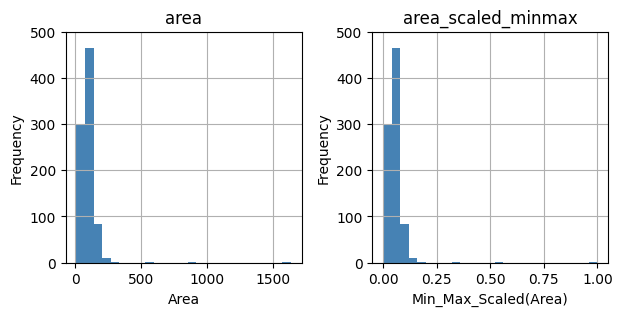

In [18]:
# Min-Max scaling of the variable 'area'
df['area_scaled_minmax'] = (df['area'] - df['area'].min()) / (df['area'].max() - df['area'].min())

# Histogram of the variable 'area' and 'area_scaled'
ax = df[['area', 'area_scaled_minmax']].hist(bins=25, 
                                      figsize=(7, 3), 
                                      color='steelblue')
                                      
# Set the y-axis range for each subplot and add labels
for axis, label in zip(ax.flatten(), ['Area', 'Min_Max_Scaled(Area)']):
    axis.set_ylim(0, 500)
    axis.set_xlabel(label)
    axis.set_ylabel('Frequency')

# Display the plot
plt.show()

### Max-Absolute Scaling

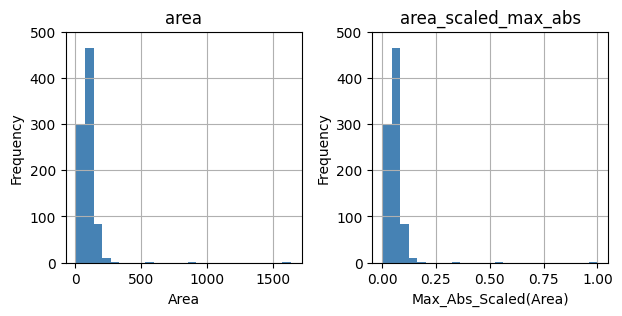

In [19]:
# Max-Absolute scaling of the variable 'area'
df['area_scaled_max_abs'] = df['area'] / df['area'].abs().max()

# Histogram of the variable 'area' and 'area_scaled_max_abs'
ax = df[['area', 'area_scaled_max_abs']].hist(bins=25, 
                                              figsize=(7, 3), 
                                              color='steelblue')

# Set the y-axis range for each subplot and add labels
for axis, label in zip(ax.flatten(), ['Area', 'Max_Abs_Scaled(Area)']):
    axis.set_ylim(0, 500)
    axis.set_xlabel(label)
    axis.set_ylabel('Frequency')

# Display the plot
plt.show()

### Robust Scaling

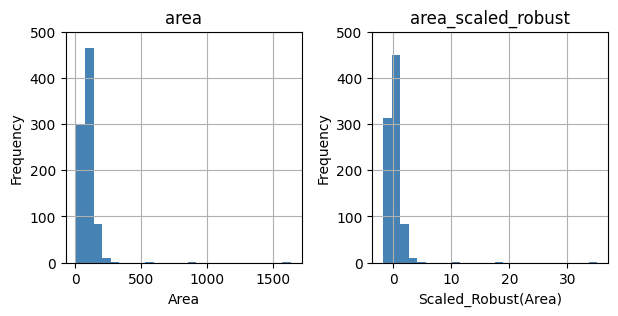

In [20]:
# Robust scaling of the variable 'area'
df['area_scaled_robust'] = (df['area'] - df['area'].median()) / \
                           (df['area'].quantile(0.75) \
                           - df['area'].quantile(0.25))

# Histogram of the variable 'area' and 'area_scaled_robust'
ax = df[['area', 'area_scaled_robust']].hist(bins=25, 
                                             figsize=(7, 3), 
                                             color='steelblue')

# Set the y-axis range for each subplot and add labels
for axis, label in zip(ax.flatten(), ['Area', 'Scaled_Robust(Area)']):
    axis.set_ylim(0, 500)
    axis.set_xlabel(label)
    axis.set_ylabel('Frequency')

# Display the plot
plt.show()

## Standardization

### Z-score Normalization

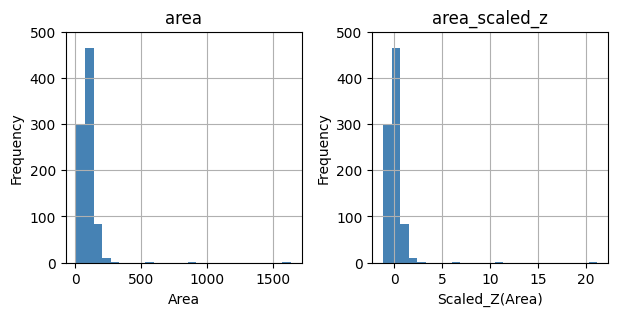

In [21]:
# Z-score Normalization of the variable 'area'
df['area_scaled_z'] = (df['area'] - df['area'].mean()) / df['area'].std()

# Histogram of the variable 'area' and 'area_scaled_z'
ax = df[['area', 'area_scaled_z']].hist(bins=25, 
                                        figsize=(7, 3), 
                                        color='steelblue')

# Set the y-axis range for each subplot and add labels
for axis, label in zip(ax.flatten(), ['Area', 'Scaled_Z(Area)']):
    axis.set_ylim(0, 500)
    axis.set_xlabel(label)
    axis.set_ylabel('Frequency')

# Display the plot
plt.show()

## Transformation

### Log-Transformation

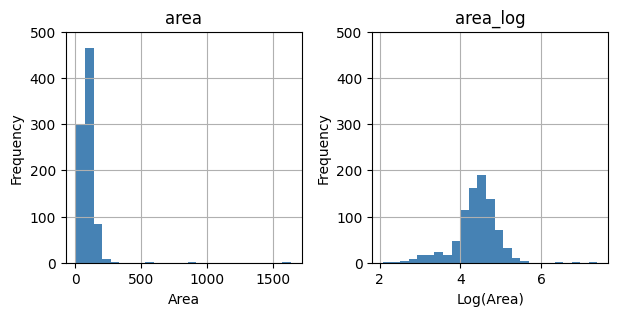

In [22]:
# Log-Transformation of the variable 'area'
df['area_log'] = np.log(df['area'])

# Histogram of the variable 'area' and 'area_log'
ax = df[['area', 'area_log']].hist(bins=25, 
                                   figsize=(7, 3), 
                                   color='steelblue')

# Set the y-axis range for each subplot and add labels
for axis, label in zip(ax.flatten(), ['Area', 'Log(Area)']):
    axis.set_ylim(0, 500)
    axis.set_xlabel(label)
    axis.set_ylabel('Frequency')

# Display the plot
plt.show()

### SQRT-Transformation

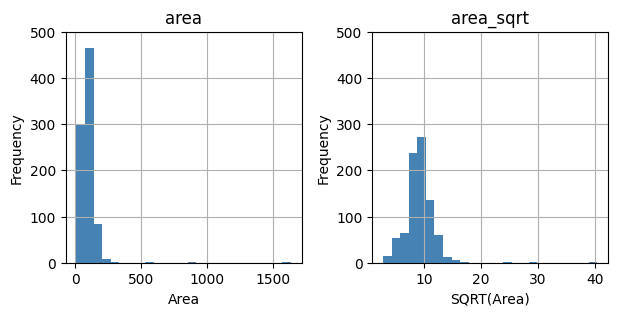

In [23]:
# SQRT-Transformation of the variable 'area'
df['area_sqrt'] = np.sqrt(df['area'])

# Histogram of the variable 'area' and 'area_sqrt'
ax = df[['area', 'area_sqrt']].hist(bins=25, 
                                    figsize=(7, 3), 
                                    color='steelblue')

# Set the y-axis range for each subplot and add labels
for axis, label in zip(ax.flatten(), ['Area', 'SQRT(Area)']):
    axis.set_ylim(0, 500)
    axis.set_xlabel(label)
    axis.set_ylabel('Frequency')

# Display the plot
plt.show()

### Box-Cox Transformation

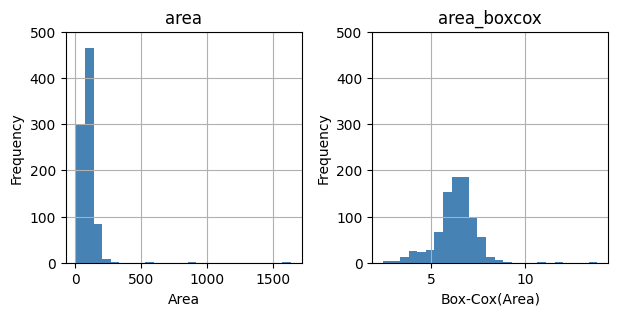

In [24]:
# Box-Cox Transformation of the variable 'area'
from scipy.stats import boxcox

# Apply Box-Cox transformation
df['area_boxcox'], _ = boxcox(df['area'])

# Histogram of the variable 'area' and 'area_boxcox'
ax = df[['area', 'area_boxcox']].hist(bins=25, 
                                      figsize=(7, 3), 
                                      color='steelblue')

# Set the y-axis range for each subplot and add labels
for axis, label in zip(ax.flatten(), ['Area', 'Box-Cox(Area)']):
    axis.set_ylim(0, 500)
    axis.set_xlabel(label)
    axis.set_ylabel('Frequency')

# Display the plot
plt.show()

## Combining & organizing data

### Reading rental apartment data with geocoded addresses

In [25]:
# Meaning of variables
# lat: geographical latitude
# lon: geographical longitude
# bfs_number: official municipality id
# bfs_name: official municipality name

# Geocoded data (i.e. data with latitude and longitude)
df_geo = pd.read_csv('./Data/apartments_data_geocoded.csv', 
                     sep=';', 
                     encoding='utf-8')

# Show data
df_geo.head()

,web-scraper-order,address,lat,lon,bfs_name,bfs_number
0,1693998201-1,"Neuhusstrasse 6, 8630 Rüti ZH, ZH",47.252171,8.845797,Rüti (ZH),118
1,1693998201-2,"Zürcherstrasse 1, 8173 Neerach, ZH",47.513332,8.474851,Neerach,88
2,1693998201-5,"Rotachstrasse 33, 8003 Zürich, ZH",47.370792,8.514748,Zürich,261
3,1693998201-16,"Wolframplatz 1, 8045 Zürich, ZH",47.362282,8.522193,Zürich,261
4,1693998205-25,"Badenerstrasse 67, 8953 Dietikon, ZH",47.407925,8.392561,Dietikon,243


### Join geo-information to rental apartment data using .merge()

In [26]:
df2 = df.merge(df_geo[['web-scraper-order', 
                       'lat', 
                       'lon', 
                       'bfs_number', 
                       'bfs_name']], 
               on="web-scraper-order")

# Show data
df2[['web-scraper-order',
     'address_raw',
     'price',
     'price_per_m2',
     'area',
     'rooms',
     'lat', 
     'lon', 
     'bfs_number', 
     'bfs_name']].head()

,web-scraper-order,address_raw,price,price_per_m2,area,rooms,lat,lon,bfs_number,bfs_name
0,1693998201-1,"Neuhusstrasse 6, 8630 Rüti ZH, ZH",1441,29.41,49,3.0,47.252171,8.845797,118,Rüti (ZH)
1,1693998201-2,"Zürcherstrasse 1, 8173 Neerach, ZH",1850,28.46,65,3.5,47.513332,8.474851,88,Neerach
2,1693998201-5,"Rotachstrasse 33, 8003 Zürich, ZH",4335,88.47,49,2.0,47.370792,8.514748,261,Zürich
3,1693998201-16,"Wolframplatz 1, 8045 Zürich, ZH",3515,109.84,32,2.0,47.362282,8.522193,261,Zürich
4,1693998205-25,"Badenerstrasse 67, 8953 Dietikon, ZH",3200,30.48,105,3.5,47.407925,8.392561,243,Dietikon


### Reading municipality-level data

In [27]:
# Meaning of variables:
# bfs_number: municipality id
# bfs_name: municipality name
# pop: number of residents
# pop_dens: population density per km2
# frg_pct: percentage foreigners
# emp: number of employees

df_municip = pd.read_excel('./Data/municipality_data.xlsx', 
                           sheet_name='data_for_import')
df_municip.head(5)

,bfs_number,bfs_name,pop,pop_dens,frg_pct,emp
0,1,Aeugst am Albis,1981,250.442478,14.184755,442.0
1,2,Affoltern am Albis,12303,1161.756374,28.700317,6920.0
2,3,Bonstetten,5572,749.932705,16.564968,1014.0
3,4,Hausen am Albis,3751,275.808824,16.022394,1021.0
4,5,Hedingen,3778,578.560490,16.410799,1478.0


### Join municipality data to rental apartment data using .merge()

In [28]:
# Merge needs a key which must be identical in both data sets (here the key is 'bfs_number')
df3 = df2.merge(df_municip[['bfs_number', 
                            'pop', 
                            'pop_dens', 
                            'frg_pct', 
                            'emp']], 
                on="bfs_number")

# Show data
df3[['web-scraper-order',
     'address_raw',
     'price',
     'price_per_m2',
     'area',
     'rooms',
     'lat', 
     'lon', 
     'bfs_number', 
     'bfs_name',
     'pop',	
     'pop_dens']].head()

,web-scraper-order,address_raw,price,price_per_m2,area,rooms,lat,lon,bfs_number,bfs_name,pop,pop_dens
0,1693998201-1,"Neuhusstrasse 6, 8630 Rüti ZH, ZH",1441,29.41,49,3.0,47.252171,8.845797,118,Rüti (ZH),12286,1221.272366
1,1693998201-2,"Zürcherstrasse 1, 8173 Neerach, ZH",1850,28.46,65,3.5,47.513332,8.474851,88,Neerach,3175,525.662252
2,1693998201-5,"Rotachstrasse 33, 8003 Zürich, ZH",4335,88.47,49,2.0,47.370792,8.514748,261,Zürich,420217,4778.994655
3,1693998201-16,"Wolframplatz 1, 8045 Zürich, ZH",3515,109.84,32,2.0,47.362282,8.522193,261,Zürich,420217,4778.994655
4,1693998205-25,"Badenerstrasse 67, 8953 Dietikon, ZH",3200,30.48,105,3.5,47.407925,8.392561,243,Dietikon,27746,2970.663812


## Sorting data

In [29]:
# Sorting data by 'price' and 'area' with highest price above (ascending=False)
df3 = df3.sort_values(by=['price', 'area'], 
                ascending=False)

# Show data
df3[['web-scraper-order',
     'address_raw',
     'price',
     'price_per_m2',
     'area',
     'rooms',
     'lat', 
     'lon', 
     'bfs_number', 
     'bfs_name',
     'pop',	
     'pop_dens']].head()

,web-scraper-order,address_raw,price,price_per_m2,area,rooms,lat,lon,bfs_number,bfs_name,pop,pop_dens
260,1693998265-365,"Gustav-Gull-Platz 4, 8004 Zürich, ZH",9950,71.07,140,4.5,47.379471,8.531120,261,Zürich,420217,4778.994655
261,1693998265-366,"Engweg 8, 8006 Zürich, ZH",9170,65.5,140,4.5,47.385265,8.537632,261,Zürich,420217,4778.994655
144,1693998236-207,"Etzelstrasse 35, 8038 Zürich, ZH",9150,91.5,100,3.5,47.346546,8.530695,261,Zürich,420217,4778.994655
135,1693998236-197,"Utoquai 37, 8008 Zürich, ZH",9000,53.25,169,3.5,47.363682,8.546781,261,Zürich,420217,4778.994655
345,1693998285-475,"Universitätstrasse 41, 8006 Zürich, ZH",8990,64.21,140,4.5,47.380440,8.547943,261,Zürich,420217,4778.994655


## Reshaping data

### Reshaping data using .stack() and .unstack()

In [30]:
df_sub = df3[['bfs_name', 'rooms', 'price', 'area']][:5]
print('Original shape')
print(df_sub, '\n')

df_sub_stacked = df_sub.stack()
print('Stacked')
print(df_sub_stacked, '\n')

# Using unstack
print('Unstacked (= back to original shape)')
print(df_sub_stacked.unstack())

Original shape
    bfs_name  rooms  price  area
260   Zürich    4.5   9950   140
261   Zürich    4.5   9170   140
144   Zürich    3.5   9150   100
135   Zürich    3.5   9000   169
345   Zürich    4.5   8990   140 

Stacked
260  bfs_name    Zürich
     rooms          4.5
     price         9950
     area           140
261  bfs_name    Zürich
     rooms          4.5
     price         9170
     area           140
144  bfs_name    Zürich
     rooms          3.5
     price         9150
     area           100
135  bfs_name    Zürich
     rooms          3.5
     price         9000
     area           169
345  bfs_name    Zürich
     rooms          4.5
     price         8990
     area           140
dtype: object 

Unstacked (= back to original shape)
    bfs_name rooms price area
260   Zürich   4.5  9950  140
261   Zürich   4.5  9170  140
144   Zürich   3.5  9150  100
135   Zürich   3.5  9000  169
345   Zürich   4.5  8990  140


### Reshaping data using .melt()

In [31]:
df_sub = df3[['rooms', 'price', 'area']][:5]
print('Original shape')
print(df_sub, '\n')

print('Reshaped using .melt()')
print(pd.melt(df, id_vars=['rooms'], value_vars=['price', 'area']))

Original shape
     rooms  price  area
260    4.5   9950   140
261    4.5   9170   140
144    3.5   9150   100
135    3.5   9000   169
345    4.5   8990   140 

Reshaped using .melt()
      rooms variable  value
0       3.0    price   1441
1       3.5    price   1850
2       2.0    price   4853
3       2.0    price   4335
4       2.0    price   3515
...     ...      ...    ...
1717    3.5     area     82
1718    4.0     area     73
1719    4.5     area    110
1720    3.0     area     68
1721    4.5     area    114

[1722 rows x 3 columns]


### Pivoting data using .pivot_table()

In [32]:
pivot_table = pd.pivot_table(df3[['rooms', 'price', 'price_per_m2', 'area']],
                             index=['rooms'],
                             values={'price': np.mean, 
                                     'price_per_m2': np.mean, 
                                     'area': np.mean}).round(2)

# Format the values to 2 decimal places with trailing zeros
pivot_table = pivot_table.applymap(lambda x: f"{x:.2f}" if isinstance(x, (int, float)) else x)

# Display the pivot table
pivot_table

,area,price,price_per_m2
rooms,,,
1.0,32.06,1306.35,50.17
1.5,35.97,2092.05,64.35
2.0,54.48,2138.78,42.20
2.5,67.34,2414.99,37.18
3.0,68.57,1942.66,28.31
3.5,89.50,2664.81,29.71
4.0,96.90,2798.20,29.48
4.5,114.46,3091.17,26.64
5.0,103.50,2773.75,26.59


### Jupyter notebook --footer info-- (please always provide this at the end of each notebook)

In [33]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.5.0-1025-azure
Datetime: 2024-11-03 17:14:44
Python Version: 3.11.10
-----------------------------------
